In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = '/home/atorok/private/cogs118afinal/train.csv'
df = pd.read_csv(path)
df.head()


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


/tmp/ipykernel_288/2625799189.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


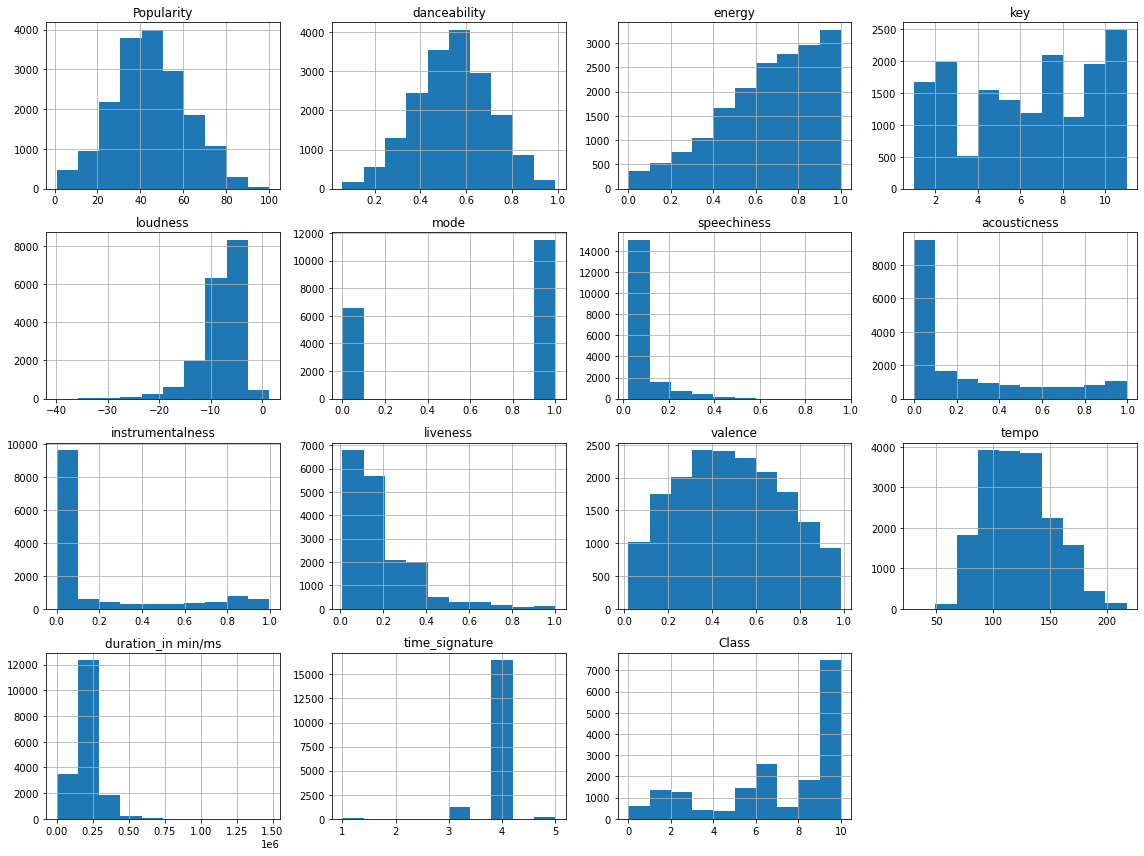

In [6]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca()
df.hist(ax = ax)
plt.tight_layout();

In [7]:
df['log-instrumentalness'] = np.log(df['instrumentalness'])
df['log-speechiness'] = np.log(df['speechiness'])
df.drop(columns = ['instrumentalness','speechiness'], inplace = True)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,log-instrumentalness,log-speechiness
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.017100,0.0849,0.8990,134.071,234596.0,4,5,NaN,-3.026191
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.001100,0.1010,0.5690,116.454,251733.0,4,10,-5.518964,-3.203987
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.486000,0.3940,0.7870,147.681,109667.0,4,6,-8.537396,-2.946942
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.021200,0.1220,0.5690,107.033,173968.0,4,5,NaN,-2.891372
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.000169,0.1720,0.0918,199.060,229960.0,4,10,-4.128936,-1.532477


In [8]:
time_sig_encoded = pd.get_dummies(df['time_signature'], prefix = 'time_sig')
key_encoded = pd.get_dummies(df['key'], prefix='key_encoded')
df = pd.concat([df, time_sig_encoded, key_encoded], axis = 1)
df.drop(['time_signature', 'key'], axis = 1, inplace = True)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,acousticness,liveness,valence,...,key_encoded_2.0,key_encoded_3.0,key_encoded_4.0,key_encoded_5.0,key_encoded_6.0,key_encoded_7.0,key_encoded_8.0,key_encoded_9.0,key_encoded_10.0,key_encoded_11.0
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.017100,0.0849,0.8990,...,0,0,0,0,0,0,0,0,0,0
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.001100,0.1010,0.5690,...,0,1,0,0,0,0,0,0,0,0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.486000,0.3940,0.7870,...,0,0,0,0,1,0,0,0,0,0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.021200,0.1220,0.5690,...,0,0,0,0,0,0,0,0,1,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.000169,0.1720,0.0918,...,1,0,0,0,0,0,0,0,0,0


In [10]:
data = df.dropna()
print(data.shape, df.shape)

(13306, 30) (17996, 30)


In [15]:
y = np.asarray(data['Class'])
y.shape

(13306,)

In [17]:
X = np.asarray(data.loc[:, ~data.columns.isin(['Class', 'Artist Name', 'Track Name'])])
X.shape

(13306, 27)

In [18]:

from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)